# Multiple Linear Regression Model

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

## Importing Data

In [3]:
dataset = pd.read_csv("insurance.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(x[:5,:])
# print(dataset.head())
# print(dataset['region'].unique())

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 [33 'male' 22.705 0 'no' 'northwest']
 [32 'male' 28.88 0 'no' 'northwest']]


## Encoding categorical data

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])], remainder="passthrough")
x = np.array(ct.fit_transform(x))

In [6]:
print(x[0:2])

[[1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 19 27.9 0]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 18 33.77 1]]


## Splitting the dataset into the Training set and Test Set

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

## Training the Multiple Linear Regression model on the training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

## Predicting the test set results

In [9]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
result = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
# print(result)

## Evaluating the Model Performance

In [10]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_test, y_pred)*100
print("Accuracy: {}%".format(round(r2Score,2)))

Accuracy: 79.09%


## Regression Line

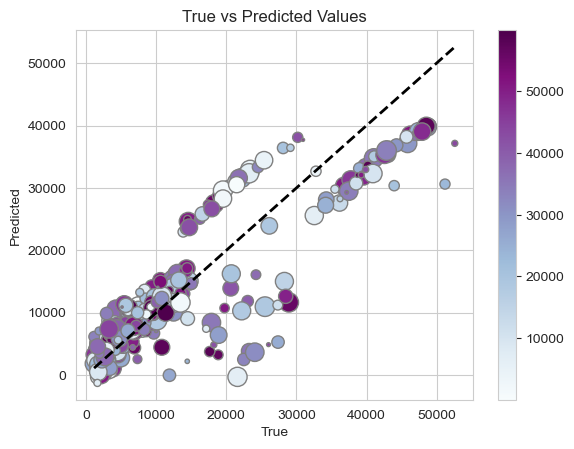

In [29]:
sizes = np.random.randint(200, size=len(y_pred))
colors = np.random.randint(60000, size=len(y_pred))
plt.scatter(y_test, y_pred, c=colors, cmap='BuPu',edgecolors='gray', s=sizes)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2,)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True vs Predicted Values')
plt.colorbar()
plt.show()

## Heatmap of features

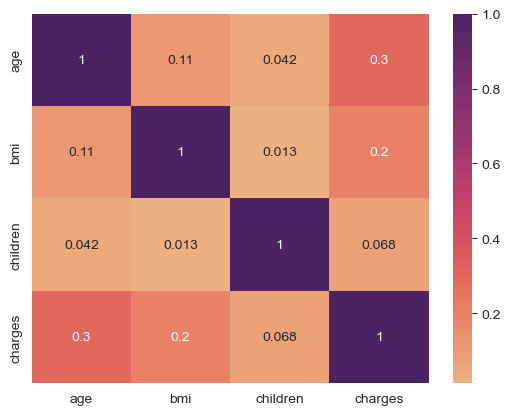

In [34]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='flare')
plt.show()